Шичко Алексей М8О-307Б-18. N25 по списку

In [1]:
import os, sys
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.utils.validation import check_X_y, check_array

from collections import Counter, defaultdict

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import math

%matplotlib inline
sns.set()

## Найти набор данных (датасет)

Mobile Price Classification (https://www.kaggle.com/iabhishekofficial/mobile-price-classification)


In [2]:
data_dir  = "data"
data_fn   = "mobile_train.csv"
data_path = os.path.join(os.path.abspath(os.getcwd()), data_dir, data_fn)

mobile_data = pd.read_csv(data_path)
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
print(f'Total shape {mobile_data.shape}')
print(f'All columns: {", ".join(mobile_data.columns.values)}')

Total shape (2000, 21)
All columns: battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range


In [4]:
mobile_data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


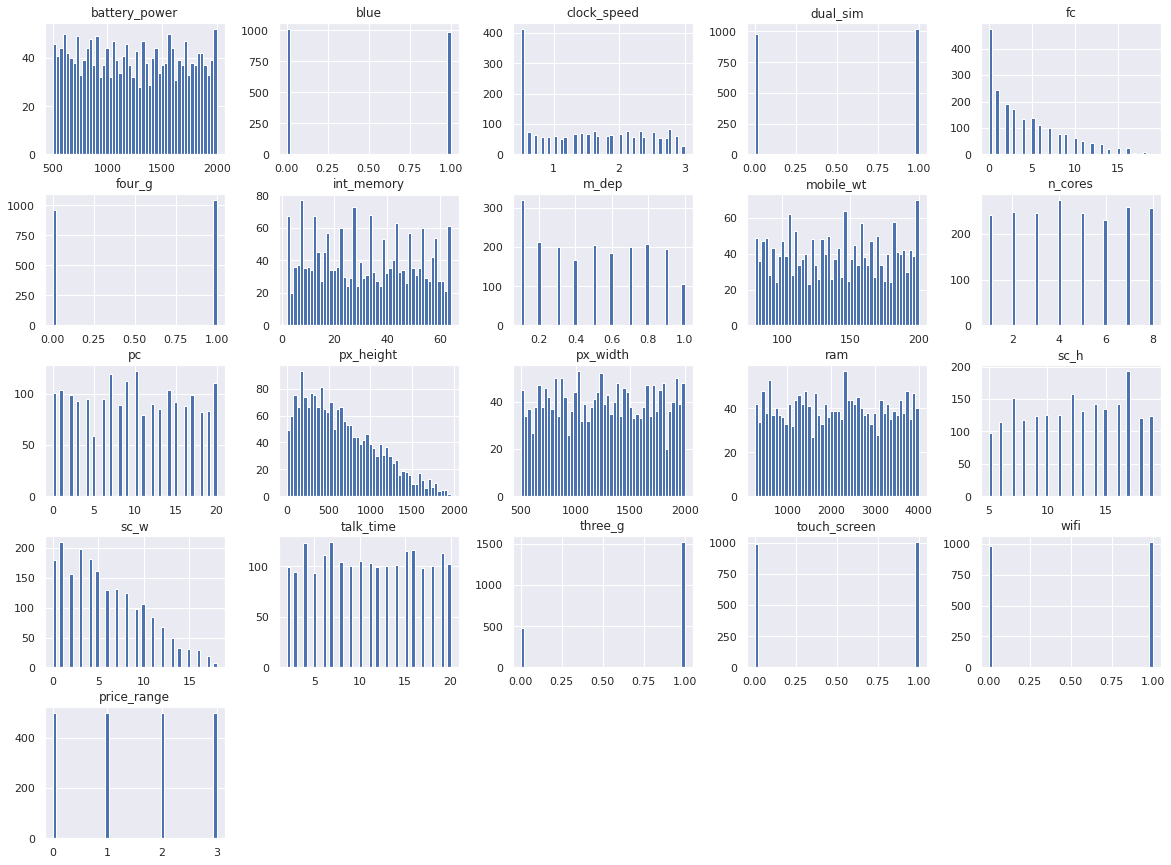

In [5]:
mobile_data.hist(bins = 50,figsize=(20,15))
plt.savefig('./pictures/mobile_hist.png')
plt.show()

In [6]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
target = 'price_range'

## Работа с выбросами

In [8]:
X = mobile_data.drop(labels=target, axis=1)
db = DBSCAN(eps = 400, min_samples = 3)
X = mobile_data.drop(labels=[target] ,axis=1)

db.fit(X)
mobile_data = mobile_data.drop(np.where(db.labels_==-1)[0])

idx = (db.labels_== -1)
db.labels_[idx].shape

(5,)

## Корреляция признаков

In [9]:
corr_matrix = mobile_data.corr()
corr_matrix[target].sort_values(ascending=False)

price_range      1.000000
ram              0.917290
battery_power    0.199229
px_width         0.167032
px_height        0.151078
int_memory       0.045241
sc_w             0.039358
pc               0.032499
three_g          0.024867
talk_time        0.022984
sc_h             0.022857
blue             0.021303
fc               0.021211
dual_sim         0.019954
wifi             0.017711
four_g           0.015924
n_cores          0.006718
m_dep           -0.000934
clock_speed     -0.007347
touch_screen    -0.031167
mobile_wt       -0.031515
Name: price_range, dtype: float64

## Результирующее описание

In [10]:
mobile_data.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,...,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,1238.771930,0.495238,1.522406,0.509774,4.311278,0.521303,32.042105,0.502005,140.210025,4.518797,...,642.029073,1249.733835,2125.666165,12.302757,5.762406,11.011028,0.761905,0.502757,0.506266,1.500251
std,439.310048,0.500103,0.815702,0.500030,4.342282,0.499671,18.142980,0.288471,35.390918,2.286198,...,440.045536,431.269283,1084.985540,4.216028,4.354719,5.464197,0.426024,0.500118,0.500086,1.118090
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.000000,1208.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1229.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,563.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,944.500000,1630.000000,3067.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.500000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Визуализация

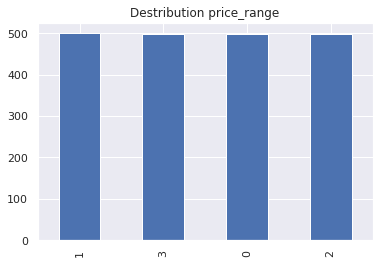

In [11]:
# Четыре кластера 0 1 2 3
fig, ax = plt.subplots(1,1)
predict_column = 'price_range'
ax.set_title(f'Destribution {predict_column}')
mobile_data['price_range'].value_counts().plot.bar(ax = ax)
fig.savefig('./pictures/mobile_kde.png')
plt.show()

In [12]:
from sklearn.manifold import TSNE
mobile_data_tsne = TSNE().fit_transform(mobile_data.drop(labels = predict_column,axis = 1))

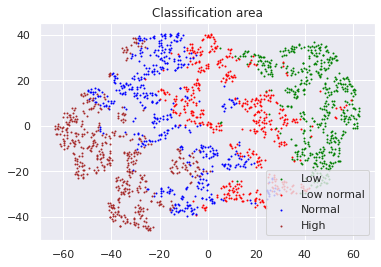

In [13]:
plt.scatter(mobile_data_tsne[mobile_data[predict_column]==0, 0], mobile_data_tsne[mobile_data[predict_column]==0, 1], c='green', label='Low',s=1)
plt.scatter(mobile_data_tsne[mobile_data[predict_column]==1, 0], mobile_data_tsne[mobile_data[predict_column]==1, 1], c = 'red', label = 'Low normal',s = 1)
plt.scatter(mobile_data_tsne[mobile_data[predict_column]==2, 0], mobile_data_tsne[mobile_data[predict_column]==2, 1], c = 'blue', label = 'Normal',s = 1)
plt.scatter(mobile_data_tsne[mobile_data[predict_column]==3, 0], mobile_data_tsne[mobile_data[predict_column]==3, 1], c = 'brown', label = 'High',s = 1)
plt.title('Classification area')
plt.legend()
plt.savefig('./pictures/mobile_tsne.png')
plt.show()

In [14]:
mobile_data.to_csv("modified_train.csv")

# Классификация

In [15]:
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score

In [16]:
def print_error_validation(accuracy, precission, roc_auc):
    print('Ошибки на кросс валидации:')
    print(f'Accuracy  = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Roc auc   = {roc_auc}')

In [17]:
def cross_val_score(model, x_train, y_train, x_test, y_test):
    acc_scores = []
    prec_scores = []
    roc_scores = []

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_train = np.column_stack((x_train, y_train))
    
    sc = model.fit(x_train, y_train)
    
    print(f'CV scores: {sc}')
    mn = sum(sc) / float(len(sc))
    print(f'Train data accuracy: {mn}')
    
    y_pred = model.predict(x_train, x_test)
    
    acc_scores.append(accuracy_score(y_test, y_pred))
    prec_scores.append(precision_score(y_test, y_pred, pos_label='positive', average='micro'))
    roc_scores.append(roc_auc_score(pd.get_dummies(y_test), 
                                    pd.get_dummies(y_pred), multi_class='ovr'))
    
    score = np.mean(acc_scores), np.mean(prec_scores), np.mean(roc_scores)
    return score

In [18]:
# разделяем данные
X, Y = mobile_data.drop(['price_range'], axis=1), mobile_data['price_range']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


## KNN

In [19]:
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a - b)**2, axis=1))

def distance_from_all_training(test_point):
    """Calculates euclidean distance of test point from all the points in the training dataset
    Args- 
        test_point- Data point from test set
        Returns- 
    dist_array- Array holding distance values for all training data points 
    """
    dist_array = np.array([])
    for train_point in X_train:
        dist = euclidean_distance(test_point, train_point)
        dist_array = np.append(dist_array, dist)
    return dist_array

import numpy as np
from collections import defaultdict

class KNN():
    def __init__(self, n_neighbors=5, weights='uniform', p=2):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p

    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def _distance(self, data1, data2):
        """1: Manhattan, 2: Euclidean"""
        if self.p == 1:
            return sum(abs(data1 - data2))          
        elif self.p == 2:
            return np.sqrt(sum((data1 - data2)**2))
        raise ValueError("p not recognized: should be 1 or 2")

    def _compute_weights(self, distances):
        if self.weights == 'uniform':
            return [(1, y) for d, y in distances]
        elif self.weights == 'distance':
            matches = [(1, y) for d, y in distances if d == 0]
            return matches if matches else [(1/d, y) for d, y in distances]
        raise ValueError("weights not recognized: should be 'uniform' or 'distance'")

    def _predict_one(self, test):
        distances = sorted((self._distance(x, test), y) for x, y in zip(self.X, self.y))
        weights = self._compute_weights(distances[:self.n_neighbors])
        weights_by_class = defaultdict(list)
        for d, c in weights:
            weights_by_class[c].append(d)
        return max((sum(val), key) for key, val in weights_by_class.items())[1]

    def predict(self, X):
        return [self._predict_one(x) for x in X]

    def score(self, X, y):
        return sum(1 for p, t in zip(self.predict(X), y) if p == t) / len(y)
        
model = KNN(5, 'distance')
model.fit(x_train.to_numpy(), y_train.to_numpy())
y_pred = model.predict(x_test.to_numpy())
print(f'Ошибка на выборках:\nAccuracy = {accuracy_score(y_test, y_pred)}')

Ошибка на выборках:
Accuracy = 0.9241274658573596


## KNN с Sklearn

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights='distance')

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'Ошибка на выборках:\nAccuracy = {accuracy_score(y_test, y_pred)}')

Ошибка на выборках:
Accuracy = 0.9241274658573596


## Наивный байесовский классификатор

In [21]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds


In [22]:
model = NaiveBayesClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'Ошибка на выборках:\nAccuracy = {accuracy_score(y_test, y_pred)}')

Ошибка на выборках:
Accuracy = 0.7890743550834598


## Naive bayes sklearn

In [23]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

print(f'Ошибка на выборках:\nAccuracy = {accuracy_score(y_test, y_pred)}')

Ошибка на выборках:
Accuracy = 0.8042488619119879
